In [ ]:
!pip install tensorflow[and-cuda]

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
# import basic libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:



df.shape

(10000, 14)

In [ ]:
#segregate the dataset into independent and dependent features AND SELECT Only relevant features

X=df.iloc[:,3:13]
pd.DataFrame(X)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y= df.iloc[:,13:]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
## Ferature Engineering
geography=pd.get_dummies (X['Geography'], drop_first=True).astype(int)
gender=pd.get_dummies (X['Gender'], drop_first=True).astype(int)

In [ ]:
X.drop(columns={'Geography','Gender'},inplace=True)

In [ ]:
# Concate geograpghy and gender feature
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
  #feature scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[-0.34459497, -0.65674999, -0.34217046, ..., -0.57559072,
         1.73073215, -1.09823226],
       [-0.09518109, -0.46637979,  0.69816249, ...,  1.73734559,
        -0.57779016, -1.09823226],
       [-0.94734518, -0.56156489,  0.35138484, ..., -0.57559072,
        -0.57779016,  0.91055421],
       ...,
       [ 0.86090545, -0.08563939, -1.38250341, ..., -0.57559072,
        -0.57779016, -1.09823226],
       [ 0.15423279,  0.39028611,  1.04494014, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [ 0.46600014,  1.1517669 , -1.38250341, ...,  1.73734559,
        -0.57779016,  0.91055421]])

In [ ]:
x_test

array([[-0.5836166 , -0.65674999, -0.68894811, ...,  1.73734559,
        -0.57779016,  0.91055421],
       [-0.30302599,  0.39028611, -1.38250341, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [-0.53165538,  0.48547121, -0.34217046, ..., -0.57559072,
         1.73073215, -1.09823226],
       ...,
       [-0.44851742, -0.65674999,  0.69816249, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [-0.74989252, -0.75193509, -1.03572576, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [-1.23832804, -1.60860099,  1.73849544, ...,  1.73734559,
        -0.57779016, -1.09823226]])

In [ ]:
#create ANN: Artificial neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# initialize ANN

classifier=Sequential()

In [ ]:
# addinf input layer
classifier.add(Dense(units=11,activation='relu'))

#adding 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))

#adding 2nd hiiden layer
classifier.add(Dense(units=6,activation='relu'))

#adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
# Train neural network

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
model_history=classifier.fit(x_train,y_train, validation_split=0.33, batch_size=10,epochs=1000)

Epoch 1/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7549 - loss: 0.5521 - val_accuracy: 0.7893 - val_loss: 0.4598
Epoch 2/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7988 - loss: 0.4464 - val_accuracy: 0.8092 - val_loss: 0.4313
Epoch 3/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8127 - loss: 0.4353 - val_accuracy: 0.8196 - val_loss: 0.4242
Epoch 4/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8230 - loss: 0.4151 - val_accuracy: 0.8226 - val_loss: 0.4171
Epoch 5/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8219 - loss: 0.4100 - val_accuracy: 0.8252 - val_loss: 0.4136
Epoch 6/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8354 - loss: 0.3813 - val_accuracy: 0.8256 - val_loss: 0.4118
Epoch 7/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8360 - loss: 0.3815 - val_accuracy: 0.8317 - val_loss: 0.4085
Epoch 8/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8342 - loss: 0.3940 - 

KeyboardInterrupt: 

In [ ]:
#early stopping: when accuracy of model is not increasing our model is stop automatically

In [ ]:
import tensorflow as tf

early_stopping=tf.keras.callbacks. EarlyStopping(
monitor="val_loss",
min_delta=0.0001,
patience=20,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=False,
)

In [ ]:
model_history=classifier.fit(x_train,y_train, validation_split=0.33, batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8625 - loss: 0.3237 - val_accuracy: 0.8460 - val_loss: 0.3748
Epoch 2/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8620 - loss: 0.3233 - val_accuracy: 0.8468 - val_loss: 0.3738
Epoch 3/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8579 - loss: 0.3384 - val_accuracy: 0.8447 - val_loss: 0.3755
Epoch 4/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8667 - loss: 0.3092 - val_accuracy: 0.8373 - val_loss: 0.3766
Epoch 5/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8723 - loss: 0.3144 - val_accuracy: 0.8460 - val_loss: 0.3710
Epoch 6/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8635 - loss: 0.3180 - val_accuracy: 0.8408 - val_loss: 0.3782
Epoch 7/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8676 - loss: 0.3107 - val_accuracy: 0.8442 - val_loss: 0.3750
Epoch 8/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8710 - loss: 0.3129 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

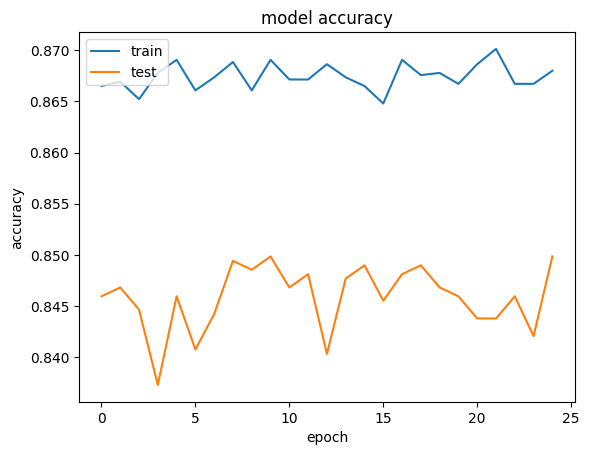

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


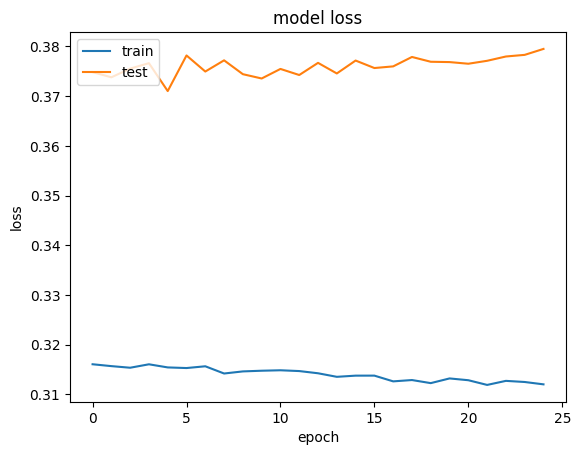

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
#making prediction and evaluate model

y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
cm

array([[2303,  113],
       [ 313,  271]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [ ]:
score

0.858

In [ ]:
#get the weights
classifier.get_weights()

[array([[ 0.6021422 ,  0.15404151, -0.27184558,  0.14504798, -0.02365828,
          0.05406061, -0.395222  ,  0.26285252,  0.00187146, -0.02380292,
          0.01913136],
        [-0.5417738 , -0.06915309, -0.87871355, -0.24197865, -0.22381935,
         -0.21844555,  0.83749026,  0.7071132 , -0.68446726,  0.4749975 ,
         -0.91411954],
        [-0.5066786 , -0.09760898, -0.01010282,  0.37271354,  0.02186209,
         -0.15778469, -0.03834923,  0.26358193, -0.05181355,  0.1171159 ,
          0.02268689],
        [-0.2581687 , -0.19142492, -0.1998615 ,  1.3118659 , -0.9321961 ,
         -0.10912184, -1.0552647 ,  0.2130621 , -0.1138287 , -0.14350195,
         -0.08874425],
        [-0.13074267, -0.30173084, -0.09625795, -0.2694478 , -0.2707577 ,
          1.0924077 ,  0.17625405, -0.34399483, -0.07405823, -1.3020945 ,
         -0.12965955],
        [ 0.5573979 , -0.3517438 ,  0.14109327,  0.02733402, -0.18836193,
         -0.18827872,  0.02227409,  0.04386577, -0.15216234, -0.2689603